# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(weather_api_key)

39517621031eb893085cd9059b04d1bb


### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#lat_lngs = zip(lats, lngs)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print (cities)
print(cities[0])
print(city)
print(lat_lngs)


Number of cities in the list: 590
['hermanus', 'sitka', 'grytviken', 'adamstown', 'queenstown', 'puerto natales', 'port-aux-francais', 'stanley', 'iskateley', 'levuka', 'tazovsky', 'nioki', 'isafjordur', 'waitangi', 'tiksi', 'happy valley-goose bay', 'georgetown', 'fannuj', 'ponta delgada', 'papatowai', 'faya-largeau', 'mossel bay', 'al jawf', "motta sant'anastasia", 'bredasdorp', 'keflavik', 'yellowknife', 'taiohae', 'albany', 'lagdo', 'iqaluit', 'mildura', 'lagos', 'jamestown', 'thompson', 'vi', 'dompu', 'magadan', 'callao', "st. john's", 'kerikeri', 'guozhen', 'punta arenas', 'klintsy', 'blackmans bay', 'codrington', 'isangel', 'sumbawa besar', 'college', 'pineville', 'lethem', 'kavaratti', 'albemarle', 'san ramon', 'mount isa', 'nuuk', 'portland', 'fatwa', 'yagry', 'corumba', 'juan griego', 'tostado', 'lascano', 'bangor', 'kataragama', 'daru', 'wailua homesteads', 'port elizabeth', 'ust-nera', 'tobelo', 'kodinsk', 'starokozache', 'port lincoln', 'aqsay', 'zouerate', 'oroquieta', 's

In [22]:
# Last value of counter lat_lng
print(lat_lng)
print(lat_lng[0])
print(lat_lng[1])

lat_lngs_ls=list(lat_lngs)
print(lat_lngs_ls)

# Visualize elements in zip function
print(type(lat_lngs))
print(type(lat_lngs_ls))
print(list(lat_lngs))


(42.85117960252954, 106.6350406107621)
42.85117960252954
106.6350406107621
[]
<class 'zip'>
<class 'list'>
[]


In [4]:
print('\nPrinting the values of zip')
for values in lat_lngs:
    print(values)  # print each tuples


Printing the values of zip


In [5]:
# Print the first API response from cities list created above 
# API call format from: https://openweathermap.org/current#name
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

url = "https://api.openweathermap.org/data/2.5/weather?"
api_key = "&appid=" + weather_api_key
city_url = url+"q="+cities[0]+api_key
print(city_url)
res=requests.get(city_url)
res_json= res.json()
print(res)
print(json.dumps(res_json, indent=4, sort_keys=True))




https://api.openweathermap.org/data/2.5/weather?q=bethel&appid=39517621031eb893085cd9059b04d1bb
<Response [200]>
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 41.3712,
        "lon": -73.414
    },
    "dt": 1689887200,
    "id": 5282297,
    "main": {
        "feels_like": 302.34,
        "humidity": 61,
        "pressure": 1012,
        "temp": 300.9,
        "temp_max": 302.9,
        "temp_min": 299.36
    },
    "name": "Bethel",
    "sys": {
        "country": "US",
        "id": 2004826,
        "sunrise": 1689845826,
        "sunset": 1689898951,
        "type": 2
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 3.09
    }
}


In [6]:
# Obtain the next parameters of first city of list:
# city_lat, city_lng, city_max_temp,city_humidity,city_clouds,city_wind,city_country,city_date
city_lat = res_json["coord"]["lat"]
city_lng = res_json["coord"]["lon"]
city_max_temp = res_json["main"]["temp_max"]
city_humidity = res_json["main"]["humidity"]
city_clouds = res_json["clouds"]["all"]
city_wind = res_json["wind"]["speed"]
city_date=res_json["dt"]
print(city_date)


1689887200


In [7]:
# Shows each 50 cities enumerated

print(cities)
for i, city in enumerate(cities):
    #print(i)   
    #print(city)     
    if (i % 50 == 0 and i >= 50):
        print(i)
        print(city)

['bethel', 'cochrane', 'adamstown', 'west island', 'invercargill', 'hadibu', 'tiksi', 'dudinka', 'lubang', 'pinarbasi', 'tura', 'college', 'waitangi', 'nema', 'ancud', 'port elizabeth', 'grytviken', 'bredasdorp', 'hermanus', 'aydarken', 'jamestown', 'ust-nera', 'al jawf', "arkhangel'sk", 'taiohae', 'an nimas', 'kununurra', 'ulysses', 'bilibino', 'port mathurin', 'khalkhal', 'hami', 'hamilton', 'ridgecrest', 'whitehorse', 'san luis', 'ghadamis', 'bardai', 'albany', 'daru', 'laascaanood', 'hualien city', 'iqaluit', 'thompson', 'san antonio de pale', 'san patricio', 'weno', 'udachny', 'kristiansund', 'afaahiti', 'nakasongola', 'qaqortoq', 'nalgonda', 'lisala', 'holualoa', 'kuta', 'utrik', 'morococha', 'prince george', 'melito di porto salvo', 'saipan', 'olonkinbyen', 'ushuaia', 'napanee', 'ilulissat', 'nadym', 'blackmans bay', 'nova vicosa', 'kalabo', 'edinburgh of the seven seas', 'longyearbyen', 'alofi', 'lebu', 'coahuayana de hidalgo', 'lensk', 'wailua homesteads', 'tucurui', 'port-aux

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

api_key = "&appid=" + weather_api_key

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[:250]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
    # https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

    #city_url = # YOUR CODE HERE
    city_url = url+"q="+cities[i]+api_key
    print(city_url)
 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather=requests.get(city_url).json()
        #city_weather = json.dumps(res_json, indent=4, sort_keys=True)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        pass

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(len(city_weather))
print(city_data)
    


Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?q=bethel&appid=39517621031eb893085cd9059b04d1bb
Processing Record 1 of Set 1 | bethel
https://api.openweathermap.org/data/2.5/weather?q=cochrane&appid=39517621031eb893085cd9059b04d1bb
Processing Record 2 of Set 1 | cochrane
https://api.openweathermap.org/data/2.5/weather?q=adamstown&appid=39517621031eb893085cd9059b04d1bb
Processing Record 3 of Set 1 | adamstown
https://api.openweathermap.org/data/2.5/weather?q=west island&appid=39517621031eb893085cd9059b04d1bb
Processing Record 4 of Set 1 | west island
https://api.openweathermap.org/data/2.5/weather?q=invercargill&appid=39517621031eb893085cd9059b04d1bb
Processing Record 5 of Set 1 | invercargill
https://api.openweathermap.org/data/2.5/weather?q=hadibu&appid=39517621031eb893085cd9059b04d1bb
Processing Record 6 of Set 1 | hadibu
https://api.openweathermap.org/data/2.5/weather?q=tiksi&appid=39517621031eb893085cd9059b04d1bb
Processin

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,302.39,62,0,3.09,US,1689888008
1,cochrane,51.1834,-114.4687,300.88,39,0,6.17,CA,1689888007
2,adamstown,-25.0660,-130.1015,295.16,87,100,17.25,PN,1689888009
3,west island,-12.1568,96.8225,298.14,73,40,5.66,CC,1689888009
4,invercargill,-46.4000,168.3500,273.16,99,6,0.89,NZ,1689888009
...,...,...,...,...,...,...,...,...,...
236,mountain home,43.1330,-115.6912,309.86,15,20,4.47,US,1689887852
237,pacocha,-17.5833,-71.3333,290.23,82,100,2.06,PE,1689888112
238,chilliwack,49.1747,-121.9443,306.13,40,6,3.58,CA,1689888112
239,badger,64.8000,-147.5333,291.77,89,100,2.06,US,1689887842


In [16]:
# Show Record Count
city_data_df.count()

City          241
Lat           241
Lng           241
Max Temp      241
Humidity      241
Cloudiness    241
Wind Speed    241
Country       241
Date          241
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,302.39,62,0,3.09,US,1689888008
1,cochrane,51.1834,-114.4687,300.88,39,0,6.17,CA,1689888007
2,adamstown,-25.0660,-130.1015,295.16,87,100,17.25,PN,1689888009
3,west island,-12.1568,96.8225,298.14,73,40,5.66,CC,1689888009
4,invercargill,-46.4000,168.3500,273.16,99,6,0.89,NZ,1689888009


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,302.39,62,0,3.09,US,1689888008
1,cochrane,51.1834,-114.4687,300.88,39,0,6.17,CA,1689888007
2,adamstown,-25.0660,-130.1015,295.16,87,100,17.25,PN,1689888009
3,west island,-12.1568,96.8225,298.14,73,40,5.66,CC,1689888009
4,invercargill,-46.4000,168.3500,273.16,99,6,0.89,NZ,1689888009


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

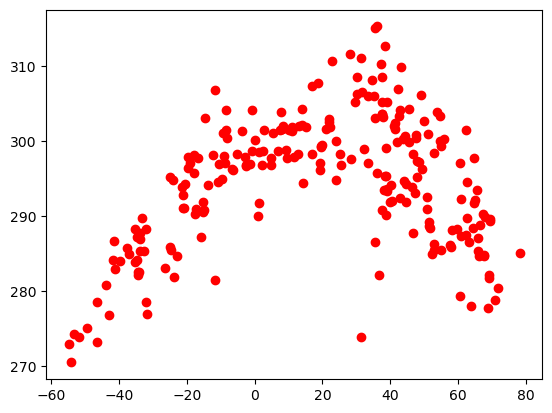

In [40]:
# Build scatter plot for latitude vs. temperature
#print(city_lat)
#print(city_max_temp)
#print(city_data_df['Lat'])
latitude = city_data_df['Lat']
temperature = city_data_df ['Max Temp']

graph1=plt.scatter(latitude, temperature, color="r", marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

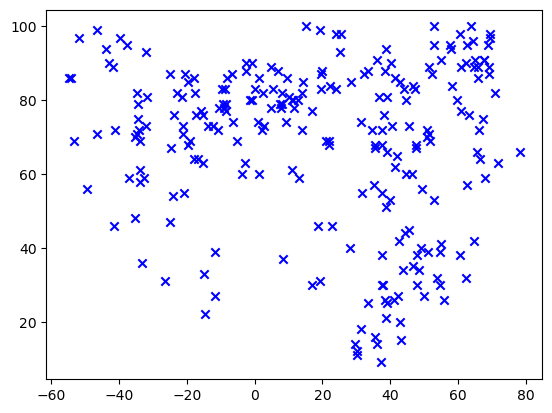

In [43]:
# Build the scatter plots for latitude vs. humidity
#print(city_humidity)
humidity = city_data_df['Humidity']
graph2 = plt.scatter(latitude, humidity, color='b', marker='x')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

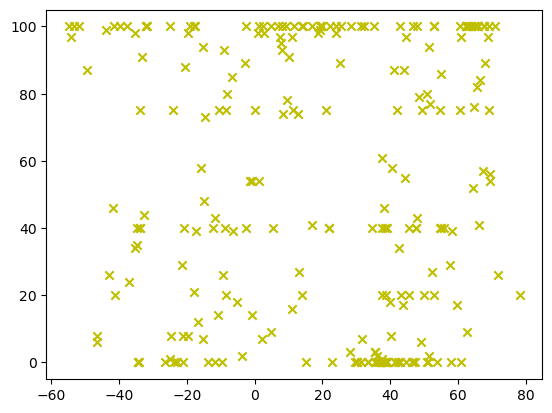

In [46]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude,cloudiness,color='y', marker='x')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

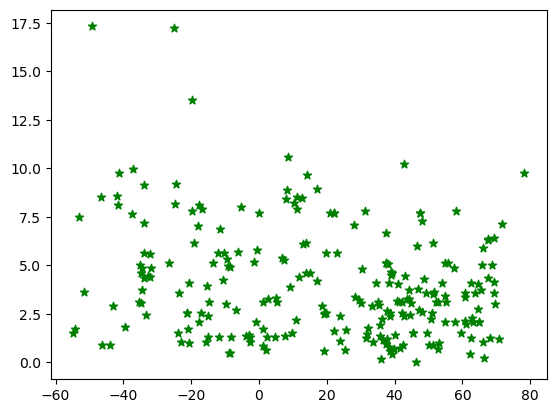

In [47]:
# Build the scatter plots for latitude vs. wind speed
windspeed=city_data_df['Wind Speed']
plt.scatter(latitude,windspeed,color='g',marker='*')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
#d = {'col1': [1, 2], 'col2': [3, 4]}
#df = pd.DataFrame(data=d)

#northern_hemi_df=pd.DataFrame(data={''})

# Display sample data
#northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE